In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [17]:
df = pd.read_excel(r'/content/ChM_SO_2021_TrialStatistics.xlsx')

In [ ]:
columns=df.columns.to_list()
columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Columns: 218 entries, Experiment to Support_Four_(%)
dtypes: float64(97), int64(11), object(110)
memory usage: 390.1+ KB


In [48]:
cat_features=df.select_dtypes(exclude='number').columns
num_features=df.select_dtypes(include=['int64', 'float64']).columns

In [60]:
df.replace('-', 0, inplace=True)

In [62]:
y= df['Group_Type']

In [70]:
df.drop(['Experiment','Group','Group_Type','Animal','Time_Point','Time_Point_Description','Trial','Group_Description', 'Trial_Description'], axis = 1, inplace=True)

In [71]:
df.isna().sum()

NumberOfRunsUsedForCalculatingTrialStatistics             0
Run_Duration_(s)_Mean                                     0
Run_Average_Speed_(cm/s)_Mean                             0
Run_Maximum_Variation_(%)_Mean                            0
RF_Stand_(s)_Mean                                         0
RF_StandIndex_Mean                                        0
RF_MaxContactAt_(%)_Mean                                  0
RF_MaxContactArea_(cm²)_Mean                              0
RF_MaxContactMaxIntensity_Mean                            0
RF_MaxContactMeanIntensity_Mean                           0
RF_PrintLength_(cm)_Mean                                  0
RF_PrintWidth_(cm)_Mean                                   0
RF_PrintArea_(cm²)_Mean                                   0
RF_MaxIntensityAt_(%)_Mean                                0
RF_MaxIntensity_Mean                                      0
RF_MinIntensity_Mean                                      0
RF_MeanIntensity_Mean                   

In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler

In [102]:
oe = OrdinalEncoder()
ohe = OneHotEncoder()
X_oe=oe.fit_transform(df)
X_ohe=ohe.fit_transform(df)

In [79]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X_oe)

pca= PCA()

X_pca = pca.fit_transform(X_scaled)

# Ordinal Encoding 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


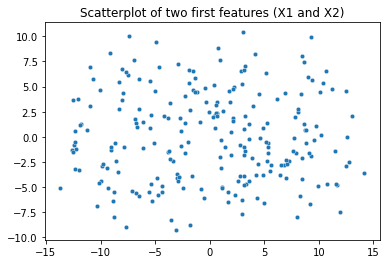

In [80]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], s=20, cmap='coolwarm')
plt.title('Scatterplot of two first features (X1 and X2)')
plt.show()

How much principal components do we need to explain variance in data? 

In [97]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0]+1

37

37 principal components explain 90.0% of variance


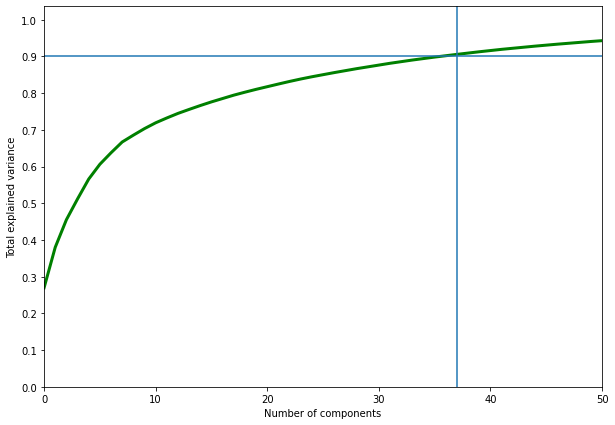

In [100]:
print(f'37 principal components explain {round(np.cumsum(pca.explained_variance_ratio_[:37])[-1],2)*100}% of variance')
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=3, color="g")
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.axvline(x=37)
plt.axhline(y=0.9)
plt.xlim(0, 50)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

# OHE and Standard Encoding

In [103]:
X_ohe.shape

(229, 37400)

#OE and Min Max scaling

In [115]:
mm_scaler=MinMaxScaler()

X_scaled=scaler.fit_transform(X_oe)

pca_mm= PCA()

X_pca_mm = pca_mm.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


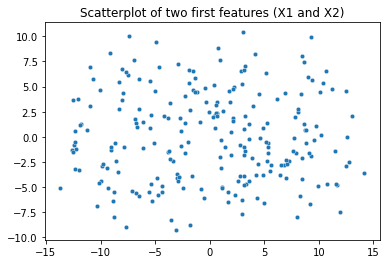

In [116]:
sns.scatterplot(X_pca_mm[:,0], X_pca_mm[:,1], s=20, cmap='coolwarm')
plt.title('Scatterplot of two first features (X1 and X2)')
plt.show()

In [117]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0]+1

37

37 principal components explain 90.0% of variance


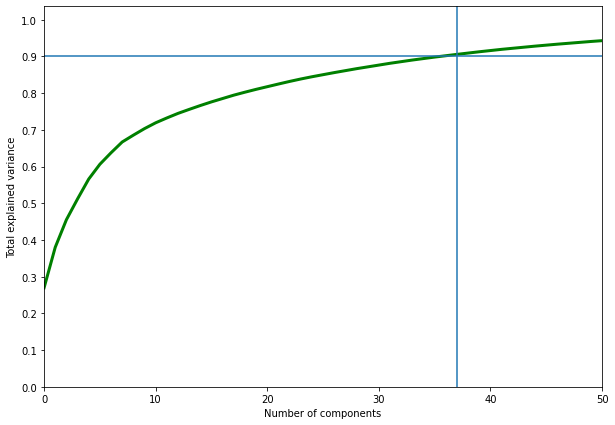

In [119]:
print(f'37 principal components explain {round(np.cumsum(pca_mm.explained_variance_ratio_[:37])[-1],2)*100}% of variance')
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_), lw=3, color="g")
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.axvline(x=37)
plt.axhline(y=0.9)
plt.xlim(0, 50)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()